In [2]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Loading Data Set

In [3]:
# Loading the Dataset
#data = pd.read_csv(r"\Users\Muhammad\Downloads\Advertising.csv")

x_lst = list(range(0,100,2))
#print(x)

y_lst = list(i*i for i in x_lst)
#print(y)



In [4]:
# Calling DataFrame after zipping both lists, with columns specified 
df = pd.DataFrame(list(zip(x_lst, y_lst)), columns =['X', 'Y'])

print(df)

     X     Y
0    0     0
1    2     4
2    4    16
3    6    36
4    8    64
5   10   100
6   12   144
7   14   196
8   16   256
9   18   324
10  20   400
11  22   484
12  24   576
13  26   676
14  28   784
15  30   900
16  32  1024
17  34  1156
18  36  1296
19  38  1444
20  40  1600
21  42  1764
22  44  1936
23  46  2116
24  48  2304
25  50  2500
26  52  2704
27  54  2916
28  56  3136
29  58  3364
30  60  3600
31  62  3844
32  64  4096
33  66  4356
34  68  4624
35  70  4900
36  72  5184
37  74  5476
38  76  5776
39  78  6084
40  80  6400
41  82  6724
42  84  7056
43  86  7396
44  88  7744
45  90  8100
46  92  8464
47  94  8836
48  96  9216
49  98  9604


# Looking into the Data set

In [5]:
#data.head()
df.head()

,X,Y
0,0,0
1,2,4
2,4,16
3,6,36
4,8,64


In [6]:
#data.tail()
df.tail()

,X,Y
45,90,8100
46,92,8464
47,94,8836
48,96,9216
49,98,9604


In [7]:
df.shape

(50, 2)

# Exploring the data Analysis

In [8]:
df.describe() # returns dtaframe containing basic statics

,X,Y
count,50.000000,50.000000
mean,49.000000,3234.000000
std,29.154759,2954.515189
min,0.000000,0.000000
25%,24.500000,601.000000
50%,49.000000,2402.000000
75%,73.500000,5403.000000
max,98.000000,9604.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       50 non-null     int64
 1   Y       50 non-null     int64
dtypes: int64(2)
memory usage: 932.0 bytes


In [ ]:
#sns.pairplot??

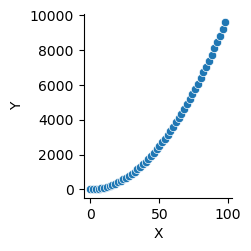

In [10]:
sns.pairplot(df, x_vars='X', y_vars='Y', kind='scatter')
plt.show()

In [11]:
df.corr()

,X,Y
X,1.000000,0.967051
Y,0.967051,1.000000


# Dataset preperation for the Polynomial regression modeling

In [12]:
X=df['X'].values.reshape(-1,1)
Y=df['Y'].values.reshape(-1,1)

In [13]:
type(X)

numpy.ndarray

In [14]:
X.shape

(50, 1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [16]:
X_train.shape

(35, 1)

# Polynomial Regression Curve Fitting

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_f = PolynomialFeatures(degree=2)
X_train_poly = poly_f.fit_transform(X_train)
X_test_poly = poly_f.fit_transform(X_test)
pol_reg = LinearRegression()
pol_reg.fit(X_train_poly, y_train)
predicted = pol_reg.predict(X_test_poly)

# Evaluation on Training Data X with Pridiction

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
Poly_MAE=mean_absolute_error(y_test, predicted)
Poly_mse = mean_squared_error(y_test, predicted)
print(f" The Mean Absolute Error= {MAE}, and Mean Squared Error= {mse}")

 The Mean Absolute Error= 1.6096161440752136e-12, and Mean Squared Error= 3.321283640178126e-24


# Linear Regression Curve Fitting 

In [29]:
from sklearn.preprocessing import PolynomialFeatures
poly_f = PolynomialFeatures(degree=1)
X_train_poly = poly_f.fit_transform(X_train)
X_test_poly = poly_f.fit_transform(X_test)
pol_reg = LinearRegression()
pol_reg.fit(X_train_poly, y_train)
predicted = pol_reg.predict(X_test_poly)

# Evaluation on Training Data X with Pridiction Linear Regression

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE=mean_absolute_error(y_test, predicted)
mse = mean_squared_error(y_test, predicted)
print(f" The Mean Absolute Error= {MAE}, and Mean Squared Error= {mse}")

 The Mean Absolute Error= 634.25135938692, and Mean Squared Error= 629838.7128817167


# Plotting

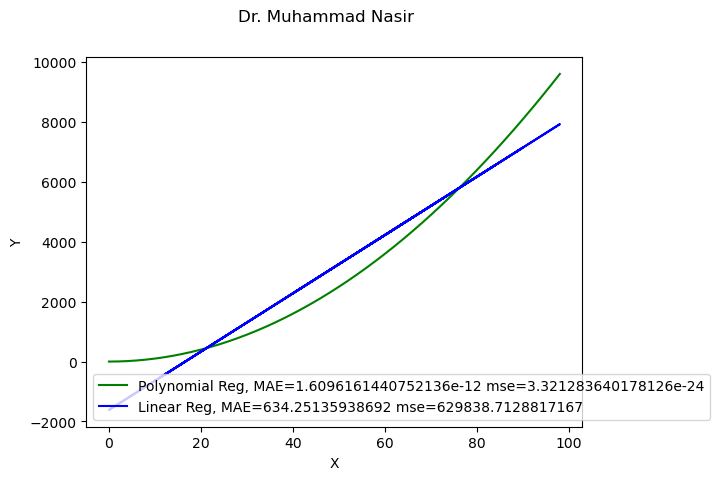

In [37]:
#plt.scatter(X,Y, s=50, alpha=0.5, label='Data')
plt.plot(X, Y, color='green', label=f'Polynomial Reg, MAE={float(Poly_MAE)} mse={float(Poly_mse)}')
plt.plot(X_test, predicted, color='blue', label=f'Linear Reg, MAE={float(MAE)} mse={float(mse)}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.suptitle('Dr. Muhammad Nasir')
plt.show()

# Conclusion

In this case study, we developed a customized dataset that has exponential values of output variable 'Y'
for input variable 'X'. 

X = [0, 1, 2, 3, ....., 100]
X = [0, 1, 4, 9, ....., 10000]

We plotted the exponantional data using uni-variate linear regression as well as with uni-variate ploynomial
regression. The results show that linear regression doesn't give good results for polynomial/exponential data.

Linear Regression Results:
----------------------------------------
The Mean Absolute Error= 634.25135938692, and Mean Squared Error= 629838.7128817167


Polynomial Regression Results:
-----------------------------------------
The Mean Absolute Error= 1.6096161440752136e-12, and Mean Squared Error= 3.321283640178126e-24

The results of Mean Absolute Error and Mean Squared Error are good for Polynomial Regression.
